In [1]:
%pip install prophet
%pip install plotly

  Using cached holidays-0.50-py3-none-any.whl.metadata (23 kB)
  Using cached tqdm-4.66.4-py3-none-any.whl.metadata (57 kB)
  Using cached stanio-0.5.0-py3-none-any.whl.metadata (1.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 8.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.4/94.4 kB 10.6 MB/s eta 0:00:00
Using cached holidays-0.50-py3-none-any.whl (1.0 MB)
Using cached tqdm-4.66.4-py3-none-any.whl (78 kB)
Using cached stanio-0.5.0-py3-none-any.whl (8.0 kB)
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import de librería
import os
from prophet import Prophet
import pandas as pd

/Users/jorgebarquero/anaconda3/envs/Enae_SeriesTemporales/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
parent_dir = os.path.dirname(os.getcwd())
data = pd.read_excel (parent_dir + '/data/raw/Liberty_RedLogistics/UnifiedData.xlsx', sheet_name='UnifiedData')
data.head()

,DUA,Item del DUA,Fecha DUA,Aduana,Regimen,Modalidad,Importador,Proveedor,Marca,Modelo,...,Total Ley 6946 US$,% DAI,Total DAI US$,COSTO por PROCOMER US$,% S.C,Total SC US$,Otros impuestos US$,Total de Impuestos,Proporción Pr FOB / impuestos,Proporción VA / impuestos
0,005-2022-001495,1,2022-01-03,SANTAMARIA,IMPORTACION DEFINITIVA,ENTREGA RAPIDA,LIBERTY EXPRESS CORPORATE VC S.A.,No disponible,No disponible,No disponible,...,0.43,14,6.04,3,0,0.00,0.11,16.03,0.485758,0.371409
1,005-2022-001495,2,2022-01-03,SANTAMARIA,IMPORTACION DEFINITIVA,ENTREGA RAPIDA,LIBERTY EXPRESS CORPORATE VC S.A.,No disponible,No disponible,No disponible,...,5.61,14,78.49,0,10,63.91,0.00,240.13,0.440048,0.428314
2,005-2022-001495,3,2022-01-03,SANTAMARIA,IMPORTACION DEFINITIVA,ENTREGA RAPIDA,LIBERTY EXPRESS CORPORATE VC S.A.,No disponible,No disponible,No disponible,...,5.76,14,80.65,0,0,0.00,0.00,172.53,0.307551,0.299490
3,005-2022-001495,4,2022-01-03,SANTAMARIA,IMPORTACION DEFINITIVA,ENTREGA RAPIDA,LIBERTY EXPRESS CORPORATE VC S.A.,No disponible,No disponible,No disponible,...,3.58,9,32.23,0,0,0.00,0.00,87.02,0.252232,0.243018
4,005-2022-001495,5,2022-01-03,SANTAMARIA,IMPORTACION DEFINITIVA,ENTREGA RAPIDA,LIBERTY EXPRESS CORPORATE VC S.A.,No disponible,No disponible,No disponible,...,0.64,14,8.94,0,0,0.00,0.00,19.12,0.357450,0.299499


In [3]:
df_prophet = data[['Fecha DUA', 'Valor CIF US$']].rename(columns={'Fecha DUA': 'ds', 'Valor CIF US$': 'y'})

NameError: name 'data' is not defined

In [3]:
# Python
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [4]:
# Python
m = Prophet()
m.fit(df)



11:05:54 - cmdstanpy - INFO - Chain [1] start processing
11:05:55 - cmdstanpy - INFO - Chain [1] done processing


In [5]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [6]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()



,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.204239,7.470871,8.885194
3266,2017-01-16,8.529231,7.829907,9.277772
3267,2017-01-17,8.316611,7.573437,8.970300
3268,2017-01-18,8.149244,7.419167,8.885593
3269,2017-01-19,8.161142,7.426887,8.836183


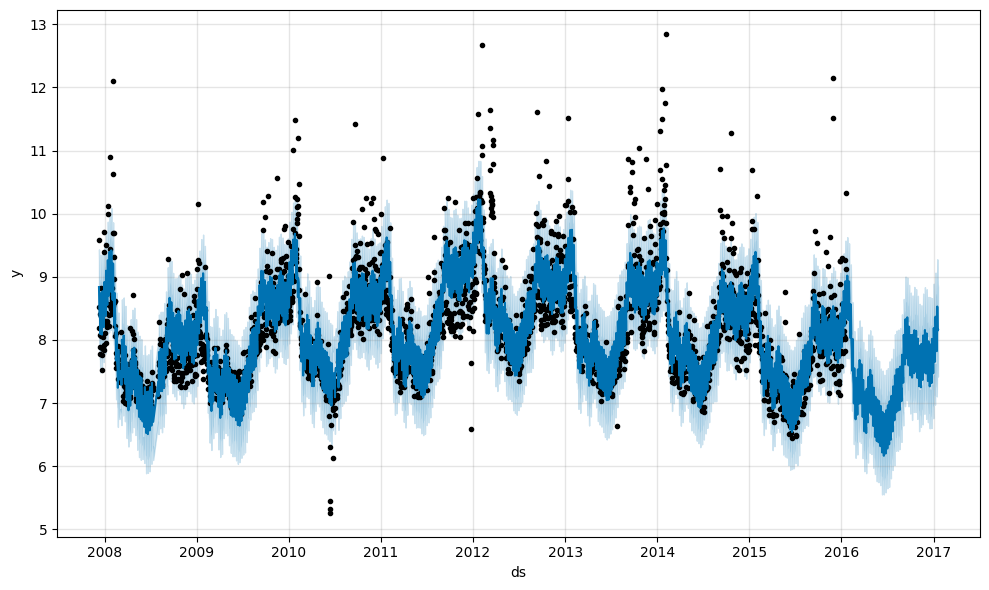

In [7]:
fig1 = m.plot(forecast)



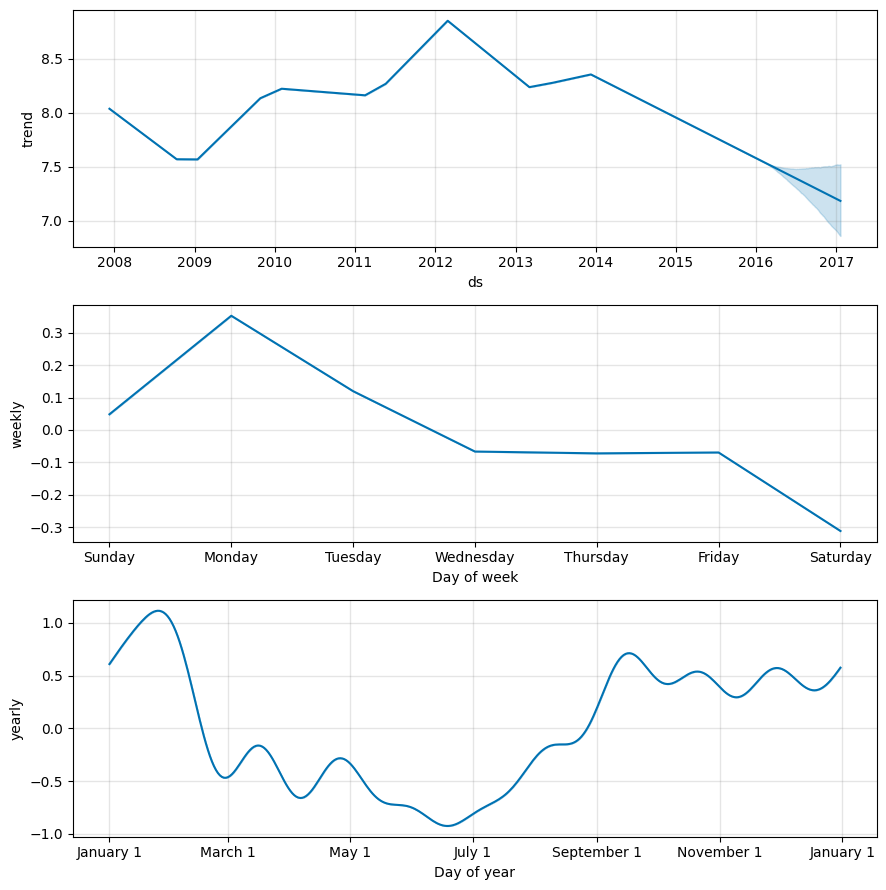

In [8]:
fig2 = m.plot_components(forecast)



In [9]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [10]:
plot_components_plotly(m, forecast)

